# __Algerian Forest Fire Dataset linear regression modelling__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [5]:
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data = data.iloc[:,:-1]
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


## __EDA for data set__

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  244 non-null    object
 1    RH          244 non-null    object
 2    Ws          244 non-null    object
 3   Rain         244 non-null    object
 4   FFMC         244 non-null    object
 5   DMC          244 non-null    object
 6   DC           244 non-null    object
 7   ISI          244 non-null    object
 8   BUI          244 non-null    object
 9   FWI          244 non-null    object
dtypes: object(10)
memory usage: 19.2+ KB


In [7]:
data = data.astype("float64")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    float64
 1    RH          244 non-null    float64
 2    Ws          244 non-null    float64
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
dtypes: float64(10)
memory usage: 19.2 KB


In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]


In [10]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(data)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [12]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


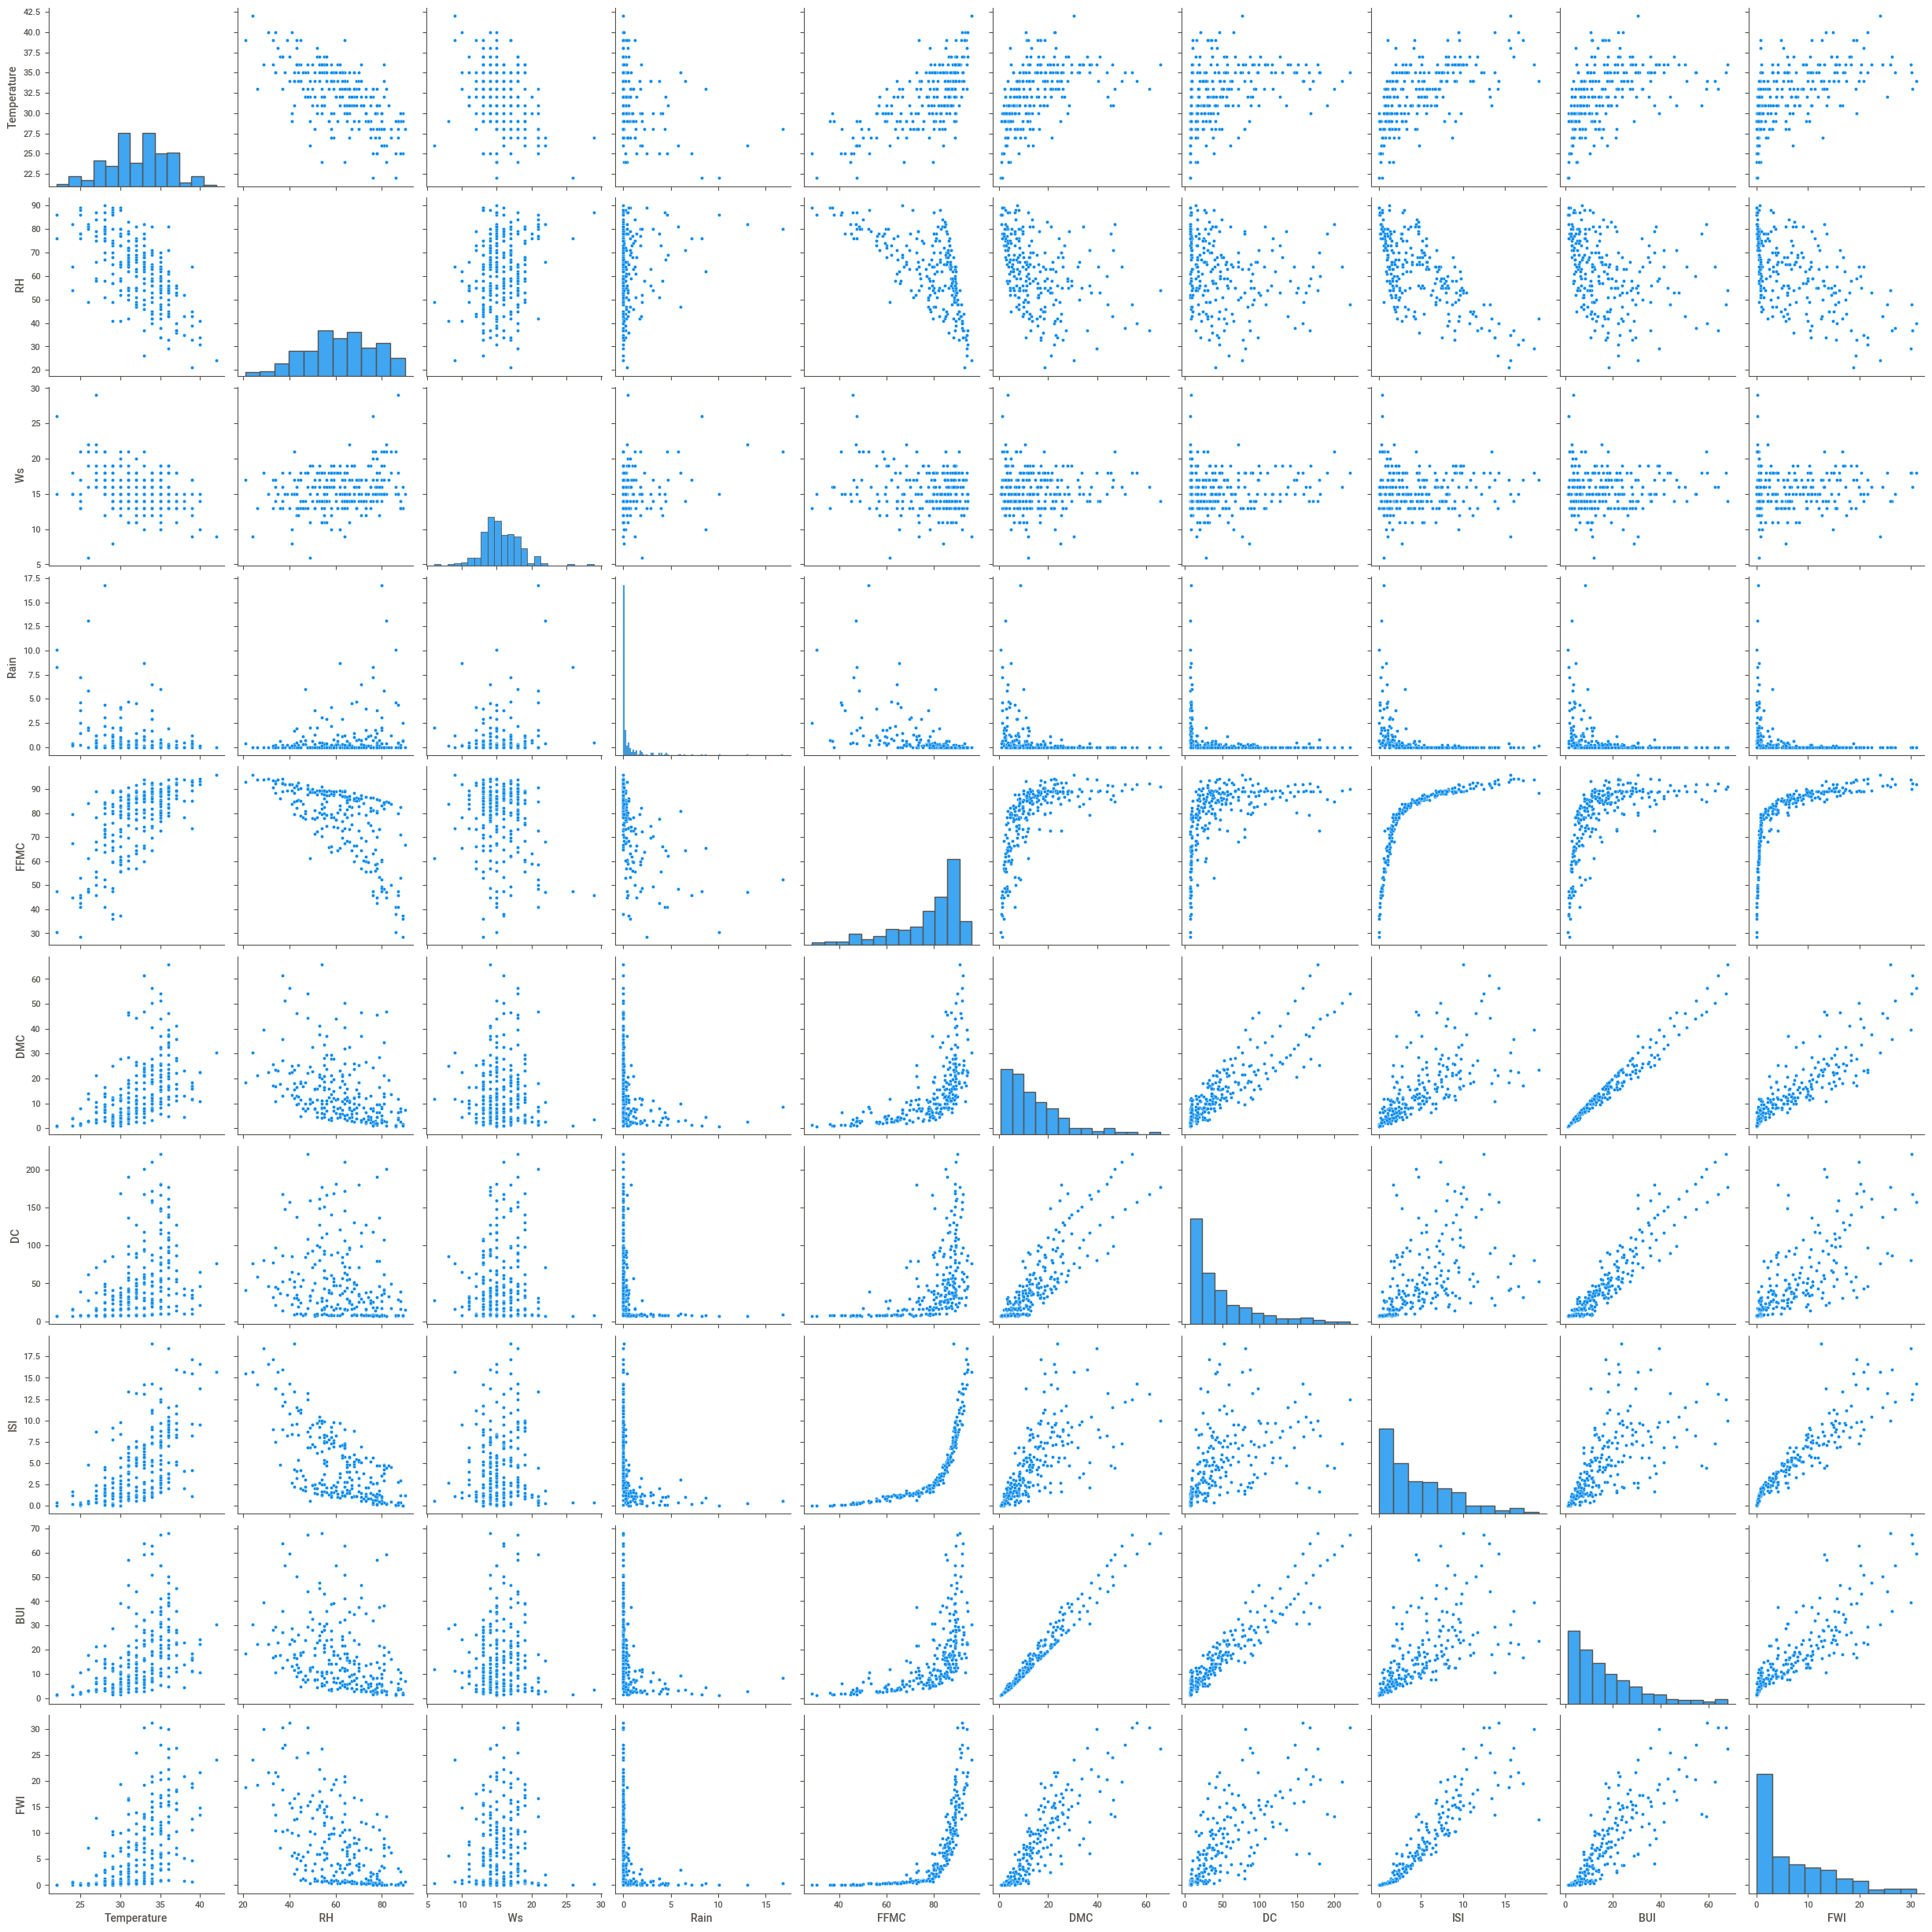

In [13]:
sns.pairplot(data)

<AxesSubplot:>

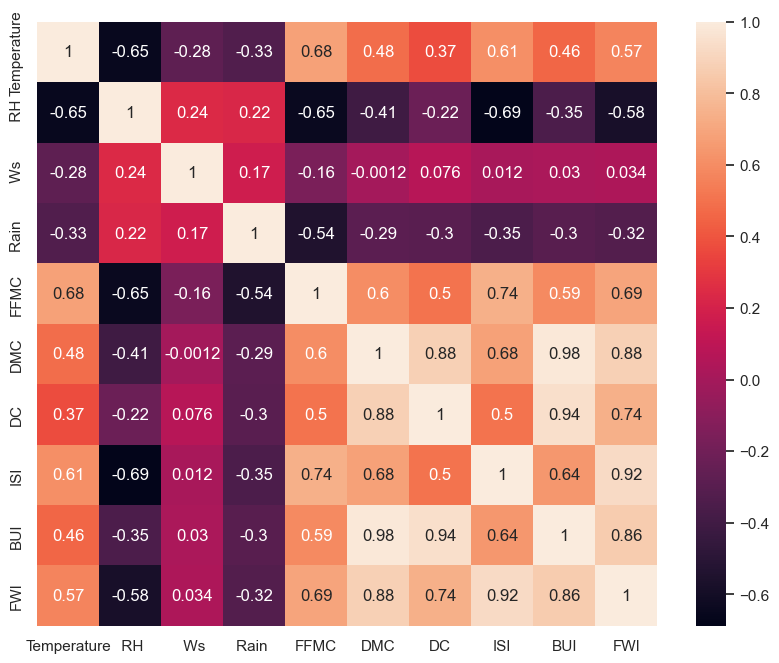

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(),annot=True)

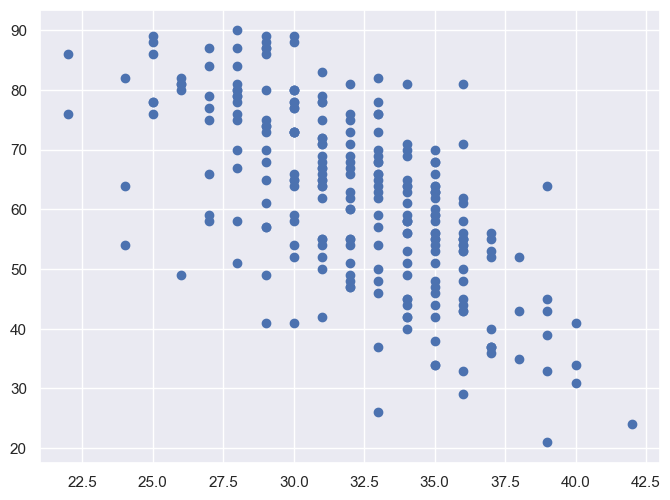

In [15]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(data["Temperature"],data[" RH"])

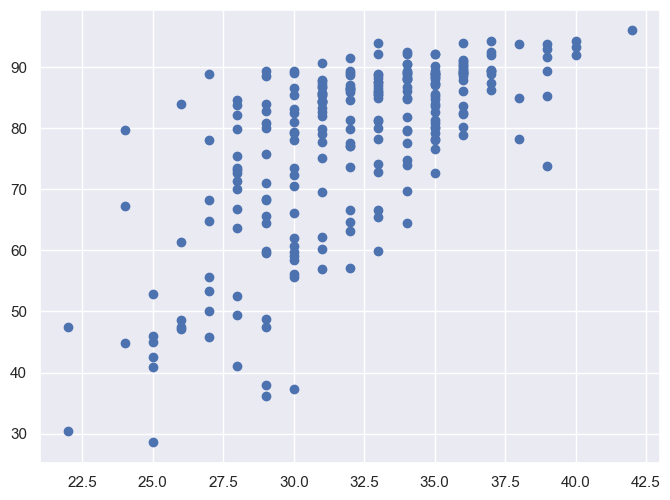

In [16]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(data["Temperature"],data["FFMC"])

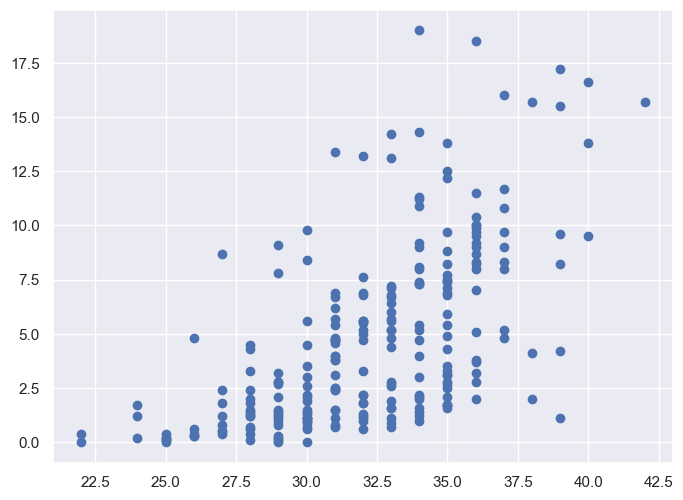

In [17]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(data["Temperature"],data["ISI"])

<AxesSubplot:xlabel='Temperature', ylabel=' RH'>

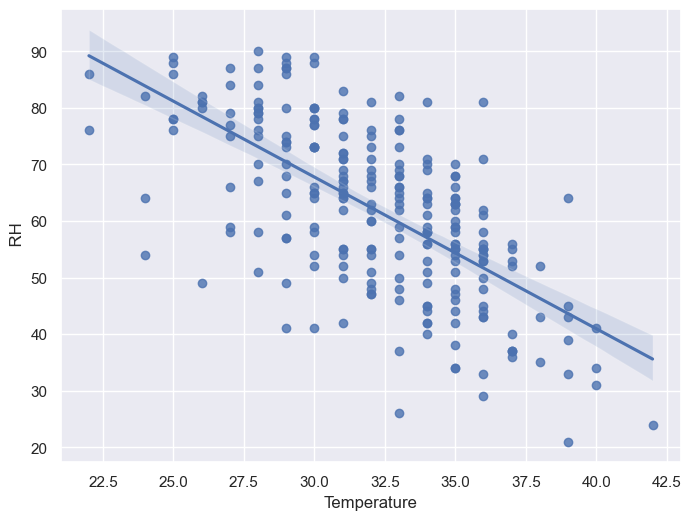

In [18]:
sns.regplot(data=data,x="Temperature",y=" RH")

<AxesSubplot:xlabel='Temperature'>

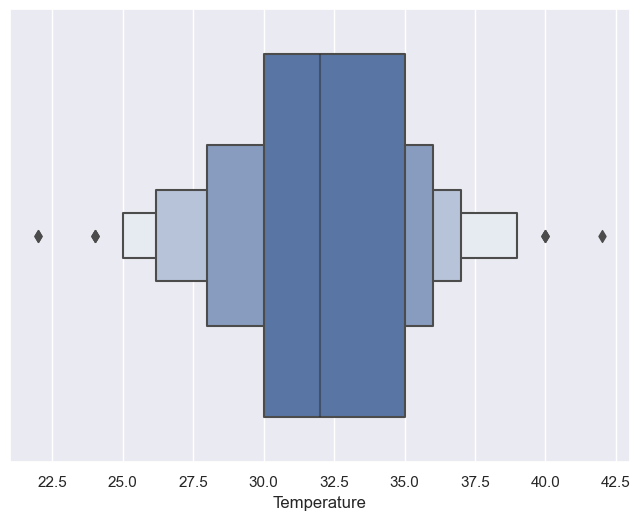

In [19]:
sns.boxenplot(x=data["Temperature"],data=data)

<AxesSubplot:xlabel='DC'>

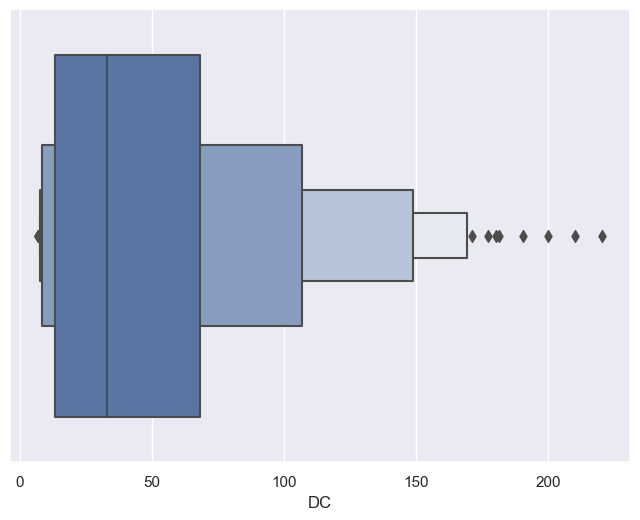

In [20]:
sns.boxenplot(x=data["DC"],data=data)

In [21]:
x = data.iloc[:,1:]
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [22]:
y = data.iloc[:,0]
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [25]:
X_train.shape

(163, 9)

In [26]:
X_test.shape

(81, 9)

In [27]:
y_train.shape

(163,)

In [28]:
y_test.shape

(81,)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

## __linear model__

In [32]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()
regg.fit(X_train,y_train)

LinearRegression()

In [33]:
print(regg.coef_)

[-1.11905525 -0.45739521  0.09691421  1.67893862  1.07917612  0.72319354
  0.11814242 -1.39324802 -0.05262333]


In [34]:
print(regg.intercept_)

31.98159509202454


In [35]:
predict = regg.predict(X_test)
predict

array([33.12113277, 34.27599153, 34.1081232 , 33.4551817 , 36.56742968,
       32.38680838, 35.34162102, 27.3654293 , 30.76167063, 29.53403578,
       29.26453111, 33.18737898, 33.74397562, 33.20293714, 34.15771284,
       32.27376808, 36.88282294, 25.33846086, 32.34613028, 33.72112033,
       30.64422533, 28.39171201, 35.13413644, 28.69736813, 36.33429667,
       26.88918698, 32.89023041, 33.36234711, 33.13267513, 34.69072521,
       34.6296513 , 31.52410657, 32.74168095, 33.33535668, 32.53412299,
       33.19055268, 30.2321709 , 34.50328733, 31.69115187, 23.92788304,
       33.8111882 , 34.00495789, 32.33564172, 24.96891784, 36.16141483,
       32.53768689, 31.24732598, 30.35652666, 35.49132159, 34.70573285,
       36.84582014, 31.16185778, 30.96947655, 34.24806396, 33.85580631,
       32.20004503, 36.68678969, 32.21851926, 30.13805868, 36.56085853,
       33.22333782, 29.95567173, 34.04112054, 32.18632508, 31.67567942,
       24.92633321, 33.25306646, 30.68494645, 36.66003733, 34.72

### __Assumptions Of Linear Regression__

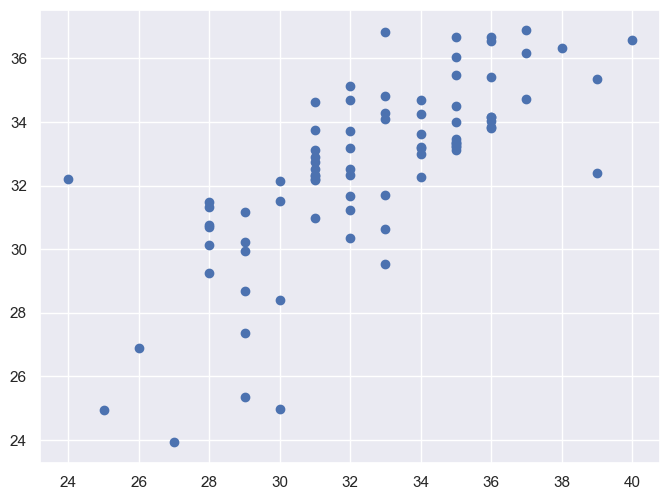

In [36]:
plt.scatter(y_test,predict)

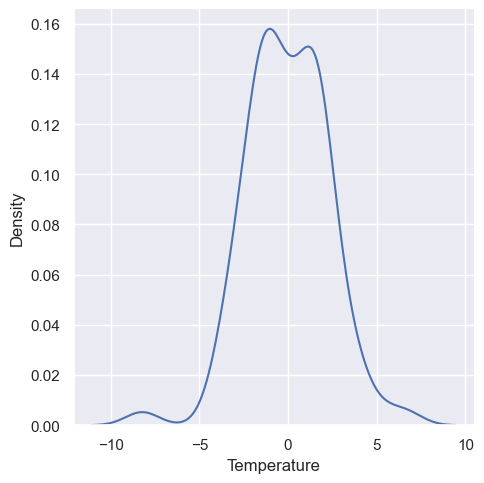

In [37]:
residual = y_test-predict
sns.displot(residual,kind="kde")

In [38]:
residual.kurtosis()

1.4665473844478676

In [39]:
residual.skew()

-0.1724108863462388

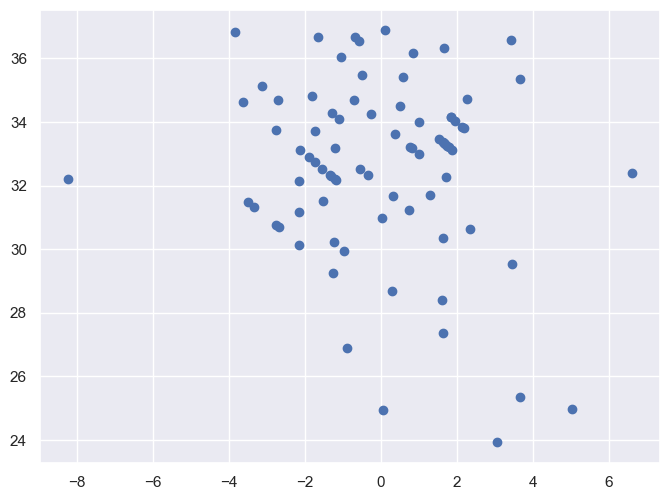

In [40]:
plt.scatter(residual,predict)

### __Performance Metrics__

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))


1.8166245543075037
5.144034073423941
2.268046312010392


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predict)
print(score)

0.5210726897157021


## __Ridge regression__

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [44]:
predict_ri = ridge.predict(X_test)
predict_ri

array([33.12618992, 34.24674   , 34.06922682, 33.42510732, 36.53814134,
       32.42996174, 35.30762891, 27.4057252 , 30.79261446, 29.54793777,
       29.25913293, 33.24772941, 33.71838792, 33.21993484, 34.21546555,
       32.23843379, 36.80045992, 25.41971491, 32.30821218, 33.6815395 ,
       30.62048363, 28.39123683, 35.11991037, 28.71361891, 36.34377989,
       26.9248708 , 32.8908782 , 33.38172768, 33.12033053, 34.62363441,
       34.62800665, 31.51025782, 32.7258902 , 33.39246733, 32.52281669,
       33.20470157, 30.18157071, 34.51169763, 31.65133631, 23.9500916 ,
       33.82657625, 33.98804714, 32.34987969, 25.03226483, 36.09250024,
       32.50666047, 31.21803583, 30.38934469, 35.45342925, 34.68761049,
       36.79108503, 31.12578978, 30.96863631, 34.33251422, 33.84410339,
       32.32887485, 36.68517508, 32.20456918, 30.13608325, 36.54981854,
       33.17022939, 29.95378642, 33.97467454, 32.15149675, 31.69665969,
       24.95146106, 33.24563787, 30.66575481, 36.63611759, 34.74

In [45]:
ridge.coef_

array([-1.128844  , -0.46133629,  0.08183743,  1.6314207 ,  0.53993679,
        0.44532083,  0.16303925, -0.55090562, -0.11702728])

In [46]:
ridge.intercept_

31.98159509202454

### __Assumptions Of ridge regression__

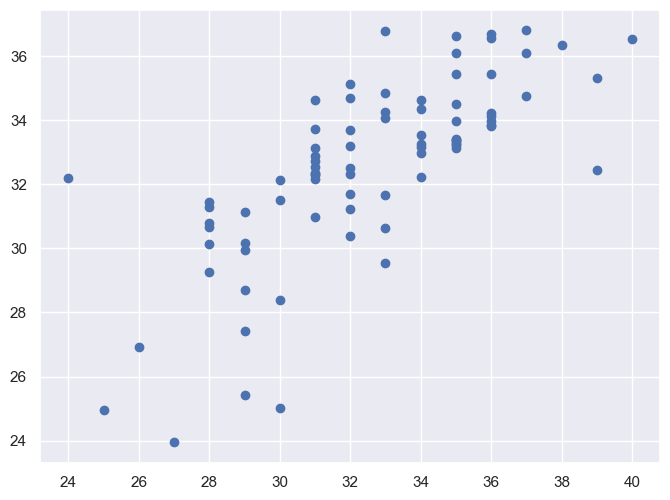

In [47]:
## asumption
plt.scatter(y_test,predict_ri)

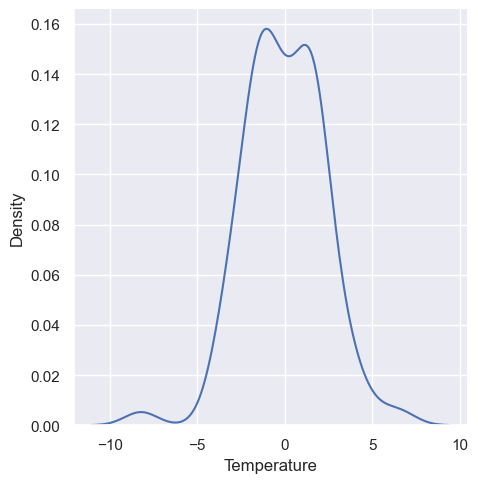

In [48]:
residual_ri = y_test - predict_ri
sns.displot(residual_ri,kind="kde")

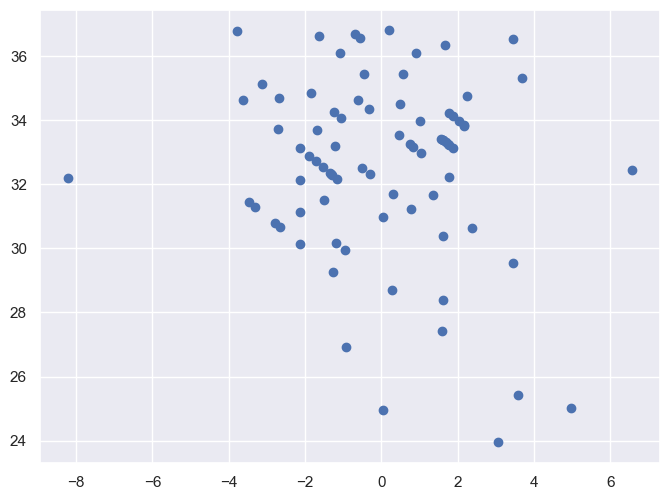

In [49]:
plt.scatter(residual_ri,predict_ri)

### __Performance Metrics__

In [50]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,predict_ri))
print(mean_absolute_error(y_test,predict_ri))
print(np.sqrt(mean_squared_error(y_test,predict_ri)))

5.10441260465425
1.812177855113185
2.2592947139880293


In [51]:
from sklearn.metrics import r2_score
score=r2_score(y_test,predict_ri)
print(score)

0.5247615850839147


## __lasso regression__

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)


Lasso()

In [53]:
predict_la = lasso.predict(X_test)
predict_la

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

In [54]:
lasso.coef_

array([-0.62324302, -0.        , -0.        ,  1.25581509,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [55]:
lasso.intercept_

31.98159509202454

### __Assumptions Of lasso regression__

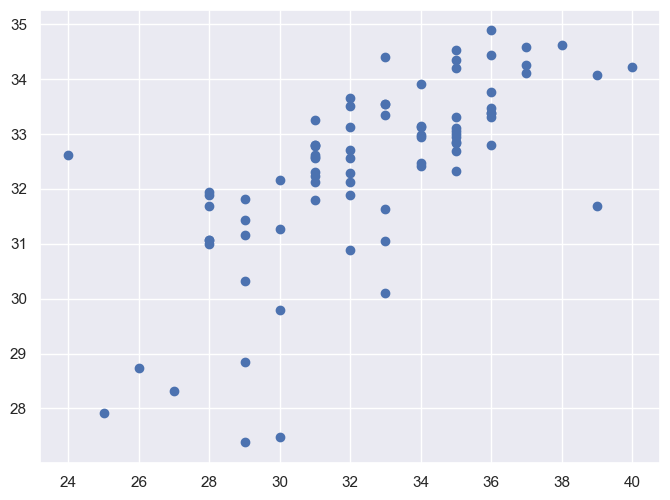

In [56]:
### Assumptions Of ridge regression
plt.scatter(y_test,predict_la)

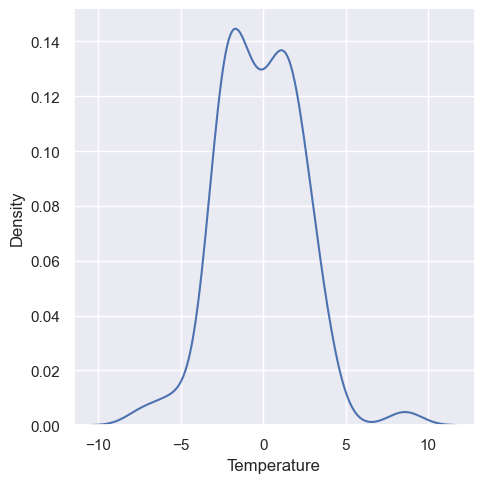

In [57]:
residual_la = predict_la - y_test
sns.displot(residual_la,kind="kde")

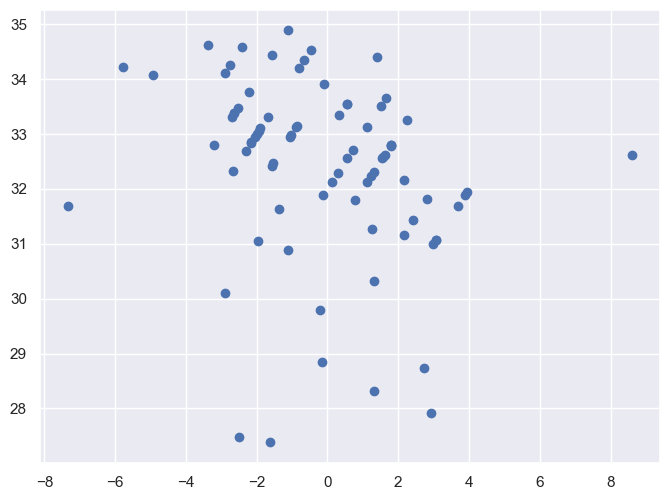

In [58]:
plt.scatter(residual_la,predict_la)

### __Performance Metrics__

In [59]:
print(mean_squared_error(y_test,predict_la))
print(mean_absolute_error(y_test,predict_la))
print(np.sqrt(mean_squared_error(y_test,predict_la)))

6.085458745527471
1.9978776414662658
2.4668722596696147


In [60]:
score=r2_score(y_test,predict_la)
print(score)

0.4334228064508907


## __ElasticNet Regression__

In [61]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [62]:
elasticnet.fit(X_train,y_train)

ElasticNet()

In [63]:
predict_en = elasticnet.predict(X_test)
predict_en

array([32.65256996, 33.25056558, 33.35664726, 32.54205018, 34.69525792,
       31.63470292, 34.18134196, 29.02965354, 30.78570894, 30.13252743,
       30.45231109, 32.31544376, 32.56189723, 32.17489562, 33.83320104,
       32.21088442, 35.64395188, 27.8812157 , 32.07683621, 32.8901327 ,
       31.08820729, 29.67645915, 33.67039069, 30.11852367, 35.39011198,
       28.87997656, 32.33069454, 32.82341449, 32.61035675, 34.16641541,
       33.29924587, 31.22742866, 32.68528639, 33.03186089, 32.16811667,
       32.44762109, 30.87567129, 33.23168415, 31.06207802, 27.9644791 ,
       32.74801743, 32.75694081, 32.24725645, 27.82670749, 34.70745611,
       32.35515881, 31.6432799 , 30.77367885, 34.28175003, 33.57529939,
       35.63209843, 31.30433666, 31.51696316, 33.59539218, 33.60290528,
       32.23503043, 36.10463476, 32.05723319, 30.86007637, 34.88440778,
       33.04643393, 30.82269541, 33.46716217, 31.88611065, 31.77279988,
       27.9685264 , 32.95696894, 31.29725359, 35.38485687, 34.13

### __Assumptions Of ElasticNet regression__

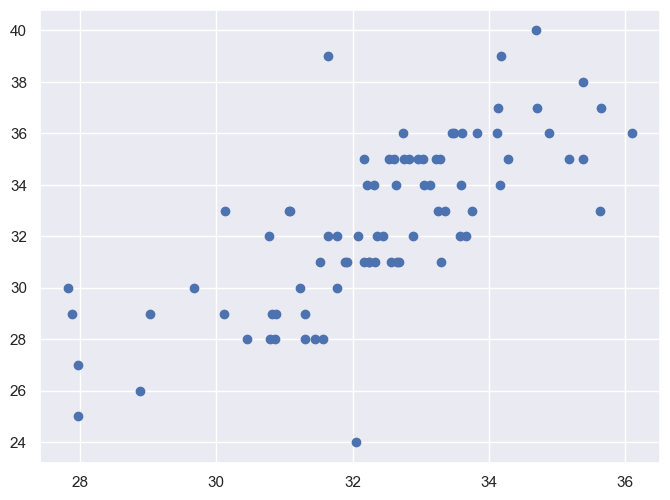

In [64]:
plt.scatter(predict_en,y_test)

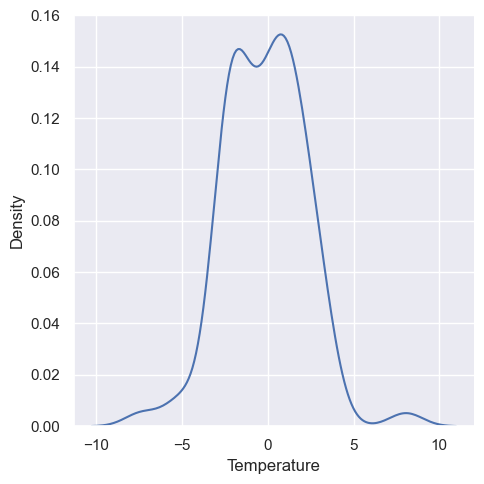

In [65]:
residual_en = predict_en - y_test
sns.displot(residual_en,kind="kde")

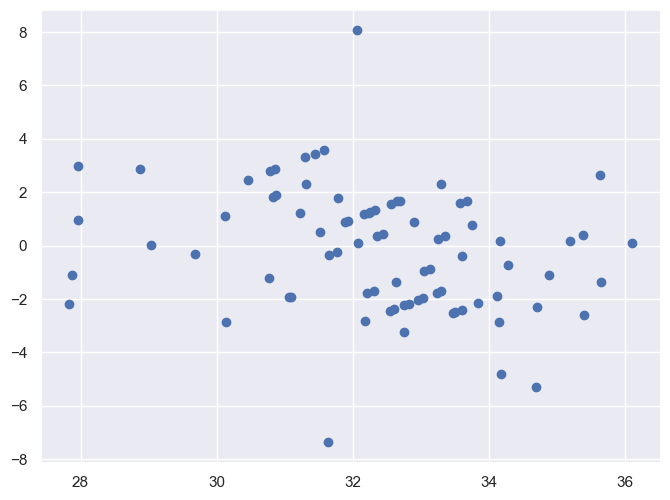

In [66]:
plt.scatter(predict_en, residual_en)

### __Performance Metrics__

In [67]:
print(mean_absolute_error(y_test,predict_en))
print(mean_squared_error(y_test,predict_en))
print(np.sqrt(mean_squared_error(y_test,predict_en)))

1.8487698991824761
5.402378245642594
2.3243016683818376


In [68]:
print(r2_score(y_test,predict_en))

0.4970199564401724
